# Isostasy Calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout
style = {'description_width': 'initial'}

'''
This function calculates the Subsidence (S) from initial thickness of crust(hC) and mantle (hM),
their stretching factors (BC, BM) and densities (dC, dM, dA).
It considers the different type of filling (water, sediment or air)
'''
def subside(hC,hM,BC,BM, fill):
    d_crust = density_crust.value  #kg/m3
    d_mantle = density_mantle.value  # lithospheric mantle density
    d_ast = density_ast.value
    d_water = density_water.value
    d_sed = density_sed.value
    d_air =density_air.value
    if fill == 'water':
        d_fill = d_water
    if fill== 'sediment':
        d_fill = d_sed
    if fill == 'air':
        d_fill = d_air
    d_w = 1000
    S = (hC*(d_ast - d_crust)*(1-1/BC) + hM*(d_ast - d_mantle)*(1-1/BM))/(d_ast - d_fill)
    return S
    

#initial parameters
d_crust = 2850  #kg/m3
d_mantle = 3300  # lithospheric mantle density at 0ºC
d_ast = 3250
d_water = 1000
d_sed = 2000
d_air = 0
Ta = 1330    #temperature of the top astenosphere
T_expansion = 2.4E-5   #coeff thermal expansion ºC-1
Young = 0.7e11  # Young's modulus Pa (= N/m**2)
Poisson = 0.25 # Poisson's ratio
gravity = 10 # m/s**2

In [2]:
density_crust = widgets.BoundedFloatText(
    value= d_crust,
    max = 3000,
    step=50,
    description='density crust:',
    disabled=False,
    style = style)
density_mantle = widgets.BoundedFloatText(
    value= d_mantle,
    max = 4000,
    step=50,
    description='density mantle:',
    disabled=False,
    style = style)
density_ast = widgets.BoundedFloatText(
    value= d_ast,
    max = 4000,
    step=50,
    description='density astenosphere:',
    disabled=False,
    style = style)
density_sed = widgets.BoundedFloatText(
    value= d_sed,
    max = 4000,
    step=50,
    description='density sediments:',
    disabled=False,
    style = style)
density_water = widgets.BoundedFloatText(
    value= d_water,
    max = 4000,
    step=50,
    description='density water:',
    disabled=False,
    style = style)
density_air = widgets.BoundedFloatText(
    value= d_air,
    max = 4000,
    step=50,
    description='density air:',
    disabled=False,
    style = style)
density_box1 = widgets.VBox([density_crust, density_mantle,density_ast])
density_box2 = widgets.VBox([density_air,density_water,density_sed])
density_box = widgets.HBox([density_box1,density_box2])
density_box

# Ocean basins: Heat flow, water depth, Lithospheric thikness and Age

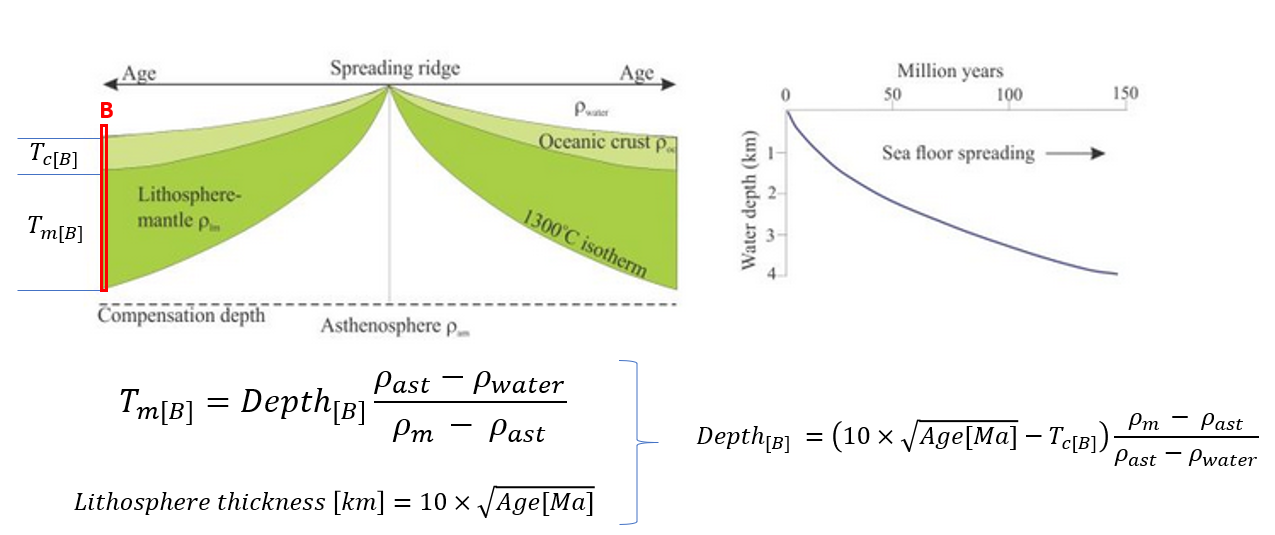

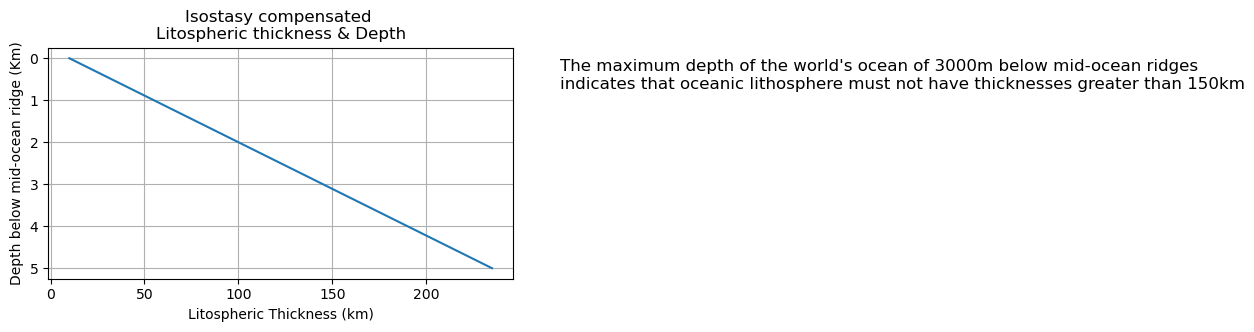

In [3]:
Depth = np.linspace(0, 5, 100)  # depth below mid-ocean ridge in km
Age = np.linspace(0, 150, 100)  #Age in Ma
T_crust = 10  # thickness of the oceanic crust
T_mantle = Depth*(d_ast-d_water)/(d_mantle-d_ast)
T_lit = T_mantle + T_crust
T_lit_age = 10*np.sqrt(Age)
Depth_Thickness = (10*np.sqrt(Age)-T_crust)*(d_mantle-d_ast)/(d_ast-d_water)
Depth_Age = 3.5*np.sqrt(Age)   # depth according to depth = 3.5xSQRT(Age)

plt.figure(figsize=(6,3))
plt.plot(T_lit,Depth)
plt.title("Isostasy compensated \nLitospheric thickness & Depth")
plt.xlabel("Litospheric Thickness (km)")
plt.ylabel("Depth below mid-ocean ridge (Km)")
plt.gca().invert_yaxis()
plt.grid()

textstr ="\
The maximum depth of the world's ocean of 3000m below mid-ocean ridges \n\
indicates that oceanic lithosphere must not have thicknesses greater than 150km"
# place a text box in upper left in axes coords
plt.annotate(textstr, fontsize=12, xy=(1.1, 0.95), xycoords='axes fraction', verticalalignment='top')

plt.show()

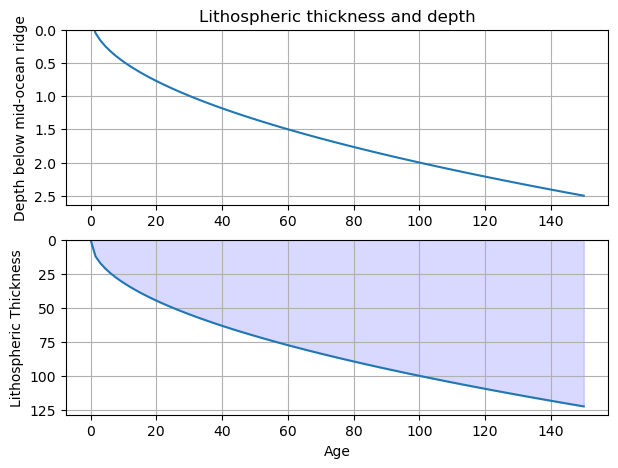

In [4]:
#plot figure
fig = plt.figure(figsize=(7, 5))

ax1 = fig.add_subplot(2,1,2)
ax1.plot(Age,T_lit_age)
ax1.fill_between(Age,T_lit_age, color = 'b', alpha = 0.15)
ax1.set_ylim(bottom=0)
plt.gca().invert_yaxis()
#plt.title("Lithospheric thickness and depth")
plt.xlabel("Age")
plt.ylabel("Lithospheric Thickness")
plt.grid()

ax2 = fig.add_subplot(2,1,1)
ax2.plot(Age,Depth_Thickness)
# ax2.plot(Age,Depth_age)     # depth according to depth = 2.5xSQRT(Age)
ax2.set_ylim(bottom=0)

plt.gca().invert_yaxis()
plt.title("Lithospheric thickness and depth")
plt.ylabel("Depth below mid-ocean ridge")
plt.grid()

plt.show()

## Stretching Factor

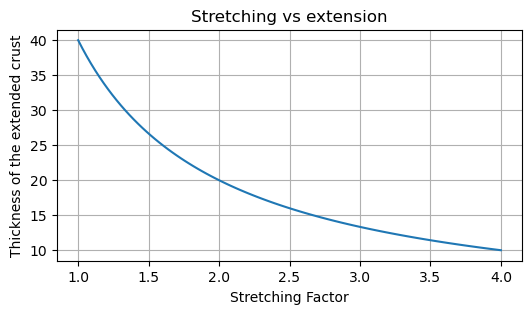

In [5]:
H0 = 40
SFactor = np.linspace(1, 4,100)
Hs = H0/SFactor

plt.figure(figsize=(6,3))
plt.plot(SFactor,Hs)
plt.title("Stretching vs extension")
plt.ylabel("Thickness of the extended crust")
plt.xlabel("Stretching Factor")
plt.grid()



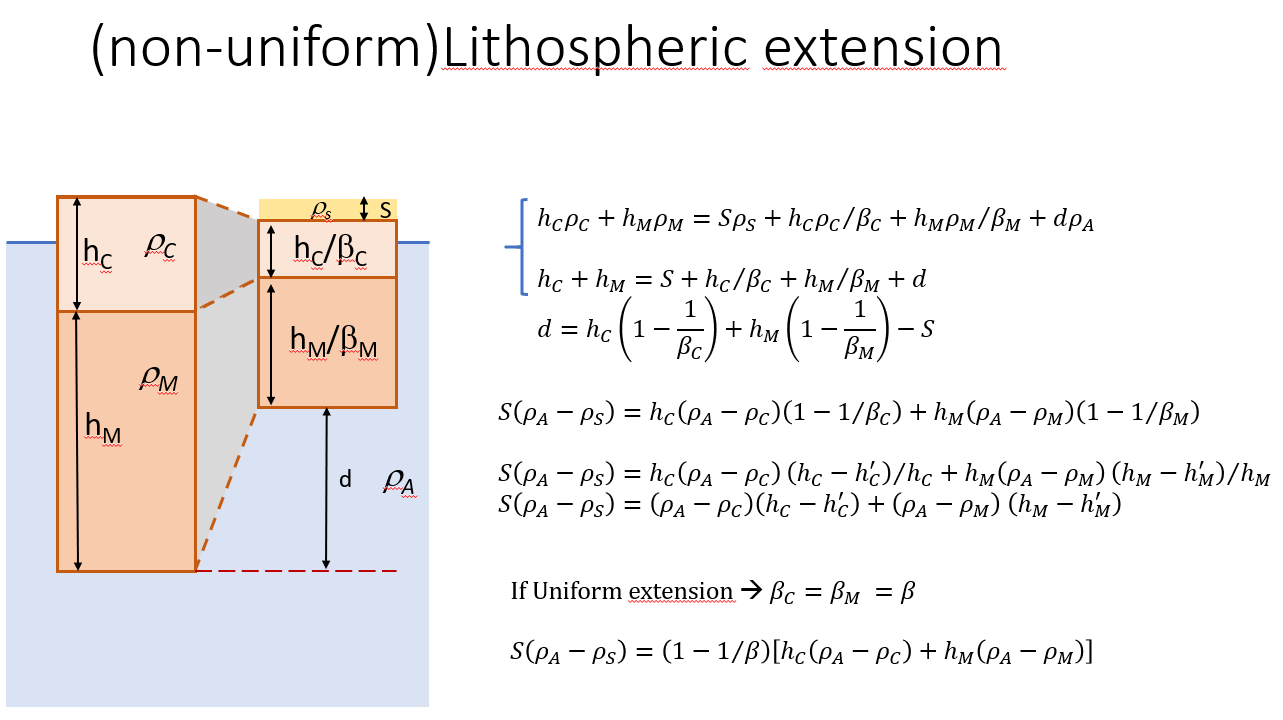

## Subsidence calculator for given initial thickness of the crust and the mantle and stretching conditions

In [6]:
stretching_data = widgets.RadioButtons(
    options=['Stretched Thickness', 'Stretching Factor'],
    description='choose:',
    value = 'Stretching Factor',
    disabled=False,
    style = style)
stretching_data

RadioButtons(description='choose:', index=1, options=('Stretched Thickness', 'Stretching Factor'), style=Descr…

In [7]:
# Set Crustal and mantle Thickness and Stretching factor

Hc = widgets.BoundedFloatText(
    value= 40,
    step=1,
    description='Initial Crustal Thickness (km):',
    disabled=False,
    style = style)
Hcs = widgets.BoundedFloatText(
    value=40,
    step=1,
    description="Stretched Crustal Thickness(km):",
    disabled=False,
    style = style)
Hm = widgets.BoundedFloatText(
    value=80,
    step=1,
    description='Initial Mantle Thickness (km):',
    disabled=False,
    style = style)
Hms = widgets.BoundedFloatText(
    value= 80,
    step=1,
    description="Stretched Mantle Thickness(km):",
    disabled=False,
    style = style)
Stretch_C = widgets.BoundedFloatText(
    value = False,
    min=1,
    max= 10,
    step=0.1,
    description='Crustal Stretching Factor:',
    layout={'width': 'max-content'}, # If the items' names are long
    disabled=False,
    style = style)
Stretch_M = widgets.BoundedFloatText(
    value = 0,
    min=1,
    max=10.0,
    step=0.1,
    description='Mantle Stretching Factor:',
    layout={'width': 'max-content'}, # If the items' names are long
    disabled=False,
    style = style)
fill = widgets.RadioButtons(
    options=['sediment', 'water','air'],
    description='basin fill:',
    value = 'sediment',
    disabled=False,
    style = style)
box1 = widgets.HBox([Hc, Hm])
box_A = widgets.HBox([Hcs, Hms])
box_B = widgets.HBox([Stretch_C, Stretch_M])
box3 = widgets.HBox([fill, density_box])
if stretching_data.value == 'Stretched Thickness':
    box2 = box_A
else:
    box2 = box_B
display(box1, box2, box3)

In [8]:
#Subsidence Calculation
hC = Hc.value
hM = Hm.value
if stretching_data.value == 'Stretched Thickness':
    BC = hC/Hcs.value
    BM = hM/Hms.value
else:
    BC = Stretch_C.value
    BM = Stretch_M.value
    
S = subside(hC,hM,BC,BM, fill = fill.value)

print('The subsidence is {0:0<3} km'.format(round(float(S),2)))

The subsidence is 0.0 km


### A plot of Subsidence for a fixed initial Lithospheric thickness of 150km, and varying crustal/lithosphere thickness ratio and uniform stretching factor.

In [9]:
fill

RadioButtons(description='basin fill:', options=('sediment', 'water', 'air'), style=DescriptionStyle(descripti…

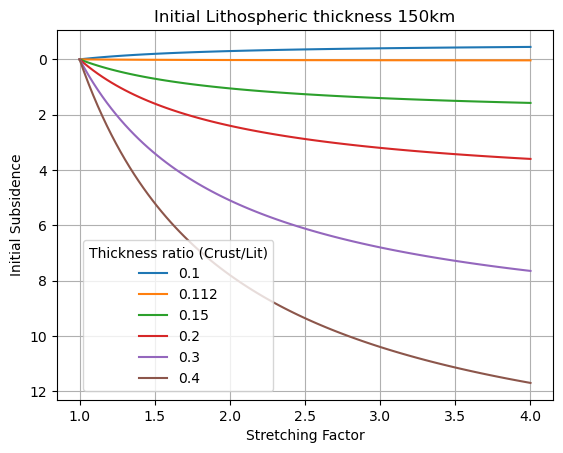

In [10]:
#water filled
#Uniform stretching
#Constant Lithospheric thickness

#stretching factors
BC = np.linspace(1, 4,100)  #Crust stretching ratio
BM = BC
# Initial thickness
#thickness_ratio = hC/(hC+hM)
hL = 150  #Constant Initial thickness of the lithosphere
thickness_ratio = [0.1, 0.112, 0.15, 0.2, 0.3, 0.4]
# Calculate subsidence
for n in range(len(thickness_ratio)):
    hC = thickness_ratio[n]*hL
    hCs = hC/BC
    hM = hL-hC
    S = subside(hC,hM,BC,BM, fill = fill.value)
    plt.plot(BC,S, label = round(thickness_ratio[n],3))
plt.title("Initial Lithospheric thickness 150km")
plt.legend(title='Thickness ratio (Crust/Lit)',  loc = 'best', bbox_to_anchor=(0.45,0.45))
plt.xlabel("Stretching Factor")
plt.ylabel("Initial Subsidence")

plt.grid()
plt.gca().invert_yaxis()

### A plot of Subsidence for a fixed initial Lithospheric thickness of 150km, and varying crustal/lithosphere thickness ratio and mantle extension 3 times larger than the crust

In [11]:
fill

RadioButtons(description='basin fill:', options=('sediment', 'water', 'air'), style=DescriptionStyle(descripti…

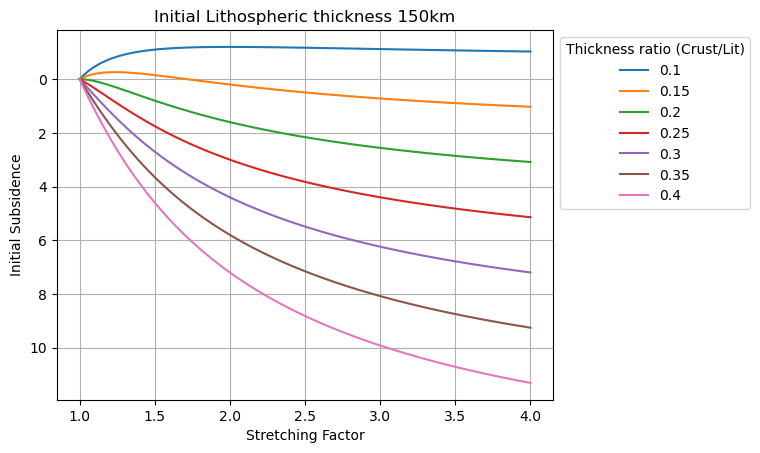

In [12]:
#water filled
#non-uniform stretching
#Constant Lithospheric thickness

#stretching factors
BC = np.linspace(1, 4,100)
BM = BC + (BC- 1)*1
# Initial thickness
thickness_ratio = hC/(hC+hM)
hL = 150  #Constant Initial thickness of the lithosphere
thickness_ratio = np.linspace(0.1, 0.4, 7)

# Calculate subsidence
for n in range(len(thickness_ratio)):
    hC = thickness_ratio[n]*hL
    hM = hL-hC
    S = subside(hC,hM,BC,BM, fill = fill.value)
    plt.plot(BC,S, label = round(thickness_ratio[n],2))
plt.title("Initial Lithospheric thickness 150km")
plt.legend(title='Thickness ratio (Crust/Lit)',  loc = 'best', bbox_to_anchor=(1, 1))
plt.xlabel("Stretching Factor")
plt.ylabel("Initial Subsidence")

plt.grid()
plt.gca().invert_yaxis()

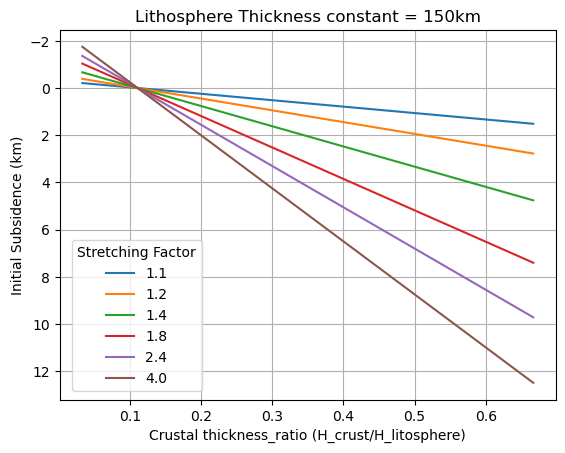

In [13]:
#Uniform extension
#sediment filled

hC = np.linspace(5, 100,100)
hM = 150-hC
thickness_ratio = hC/(hC+hM)

# uniform stretching
BC = [1.1, 1.2, 1.4, 1.8, 2.4, 4.0]
BM = BC

for n in range(len(BC)):
    S = subside(hC,hM,BC[n],BM[n], fill = 'water')
    plt.plot(thickness_ratio,S, label = BC[n])

plt.title("Lithosphere Thickness constant = 150km")
plt.legend(title='Stretching Factor',  loc = 'best', bbox_to_anchor=(0.3, 0.45))
plt.xlabel("Crustal thickness_ratio (H_crust/H_litosphere)")
plt.ylabel("Initial Subsidence (km)")

plt.grid()
plt.gca().invert_yaxis()

### EXERCISE 1
A lithospheric plate made of 40km of crust and 80km of subcrustal mantle undergoes uniform extension with a stretching factor of 2.

A) Calculate the initial (tectonic) subsidence if the basin is filled with sediments.

B) Calculate subsidence if the stretching factor of the mantle is 4.

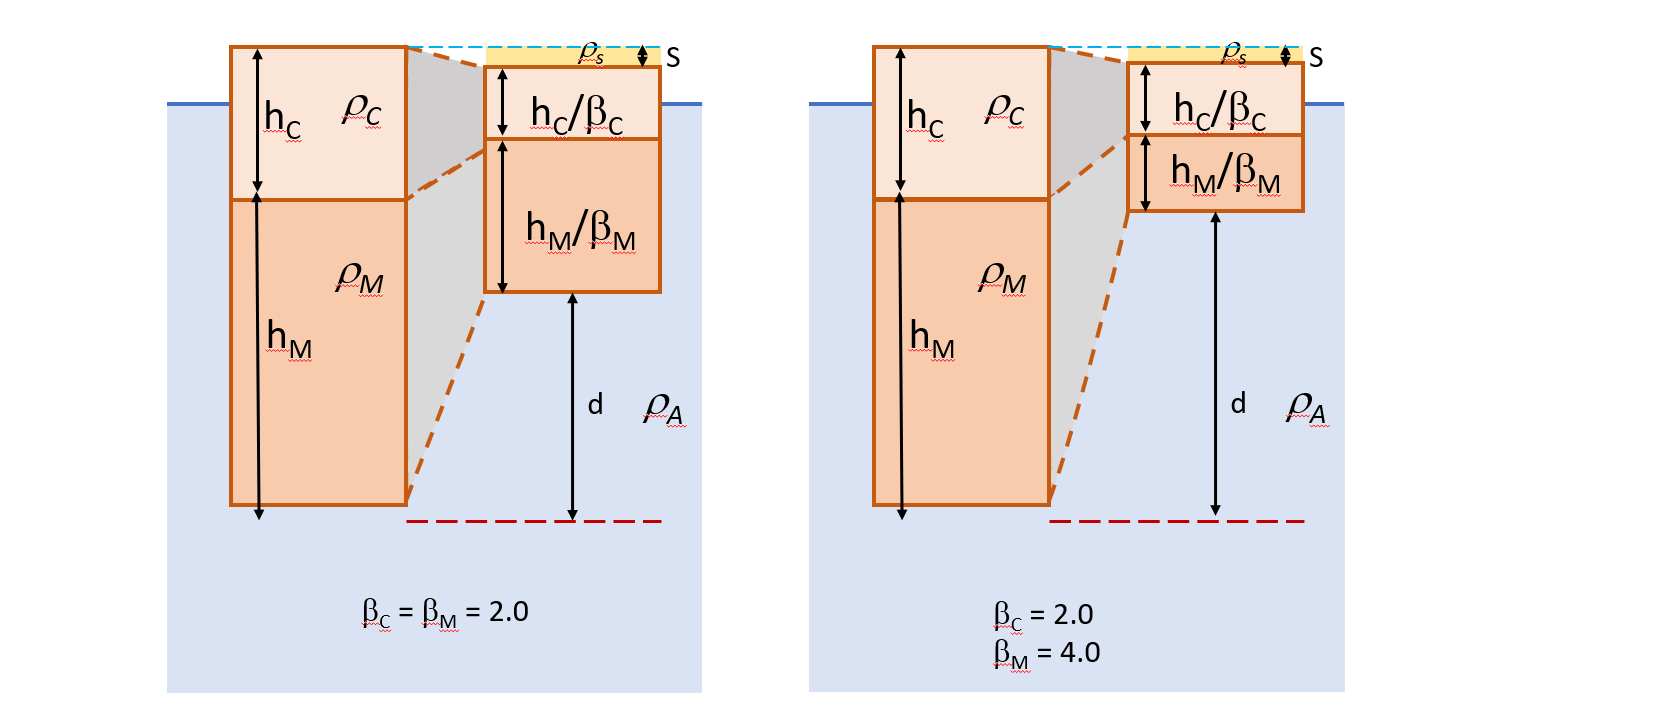

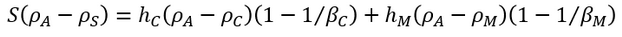

In [14]:
density_box

In [15]:
hC = 40
hM = 80
BC = 2
BM = 2
S = subside(hC,hM,BC,BM, fill = 'sediment')
print('The subsidence for uniform stretching = 2 is {0:0<3} km'.format(round(float(S),2)))

The subsidence for uniform stretching = 2 is 4.8 km


In [18]:
hC = 40
hM = 80
BC = 2
BM = 4
S = subside(hC,hM,BC,BM, fill = 'sediment')
print('The subsidence for mantle stretching factor = 4 is {0:0<3} km'.format(round(float(S),2)))                                                                    

The subsidence for mantle stretching factor = 4 is 4.0 km


# Flexure

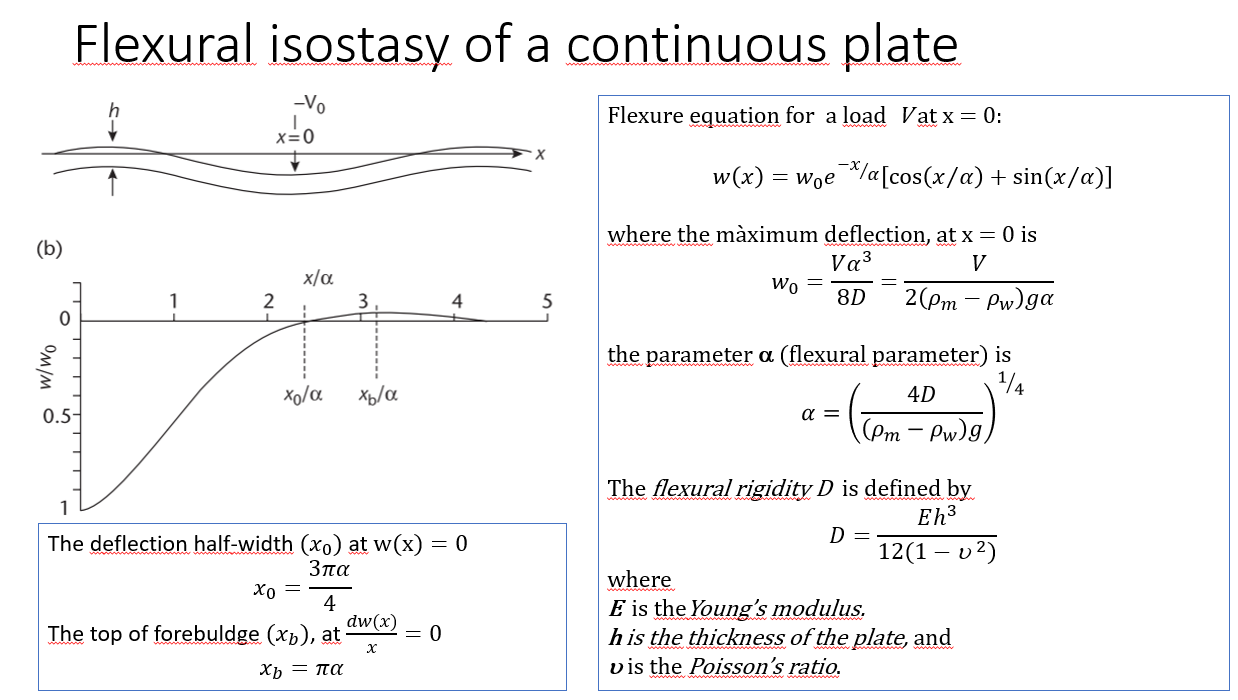

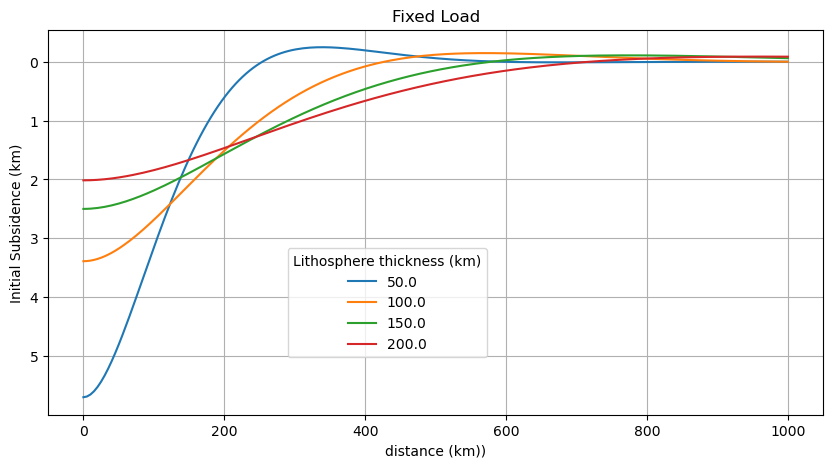

In [20]:
V = 28270644072000                 # The vertical Force applied at x=0 that drives flexure
HL = np.linspace(50000,200000,4)   # The Thickness of the plate ranging from 50km to 200km

plt.figure(figsize= (10,5))
plt.title("Fixed Load")

for n in range(len(HL)):
    #Flexural rigity
    D = (Young*(HL[n]**3))/(12*(1-Poisson**2))         #flexural rigidity
    alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25
    w0 = V*alfa**3/(8*D)                               # The maximum deflection at x = 0 
    x = np.linspace(0,1000000,200)
    w = w0*(np.e**(-x/alfa))*(np.cos(x/alfa)+np.sin(x/alfa))
    plt.plot(x/1000,w/1000,label = HL[n]/1000)
plt.gca().invert_yaxis()
plt.legend(title='Lithosphere thickness (km)',  loc = 'best', bbox_to_anchor=(0.3, 0.45))
plt.xlabel("distance (km))")
plt.ylabel("Initial Subsidence (km)")

plt.grid()


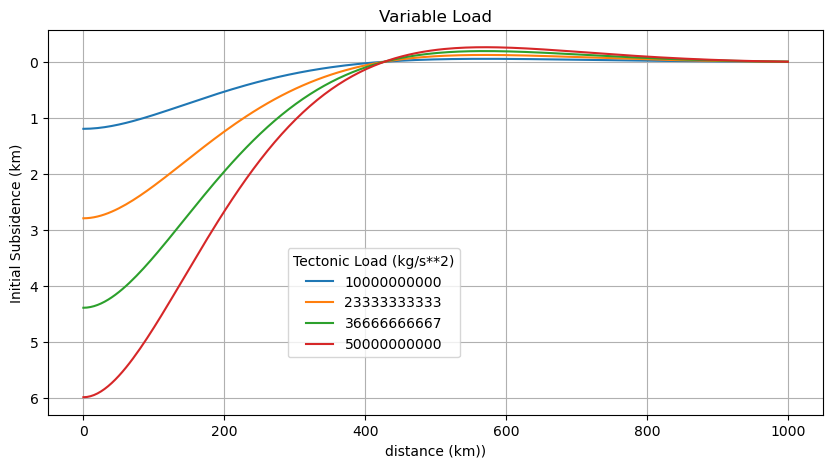

In [40]:
V = np.linspace(10000000000000,50000000000000,4)             # The vertical Force applied at x=0 that drives flexure
HL = 100000   # The Thickness of the plate in meters

plt.figure(figsize= (10,5))
plt.title("Variable Load")

for n in range(len(V)):
    #Flexural rigity
    D = (Young*(HL**3))/(12*(1-Poisson**2))         #flexural rigidity
    alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25
    w0 = V[n]*alfa**3/(8*D)                               # The maximum deflection at x = 0 
    x = np.linspace(0,1000000,200)
    w = w0*(np.e**(-x/alfa))*(np.cos(x/alfa)+np.sin(x/alfa))
    plt.plot(x/1000,w/1000,label = round(V[n]/1000))
plt.gca().invert_yaxis()
plt.legend(title='Tectonic Load (kg/s**2)',  loc = 'best', bbox_to_anchor=(0.3, 0.45))
plt.xlabel("distance (km))")
plt.ylabel("Initial Subsidence (km)")

plt.grid()


### EXERCISE 1:
##### An ocean basin floor has a depth of 4.5km. If it is filled with sediments up to sea level, what is the thickness of the sedimentary fill?

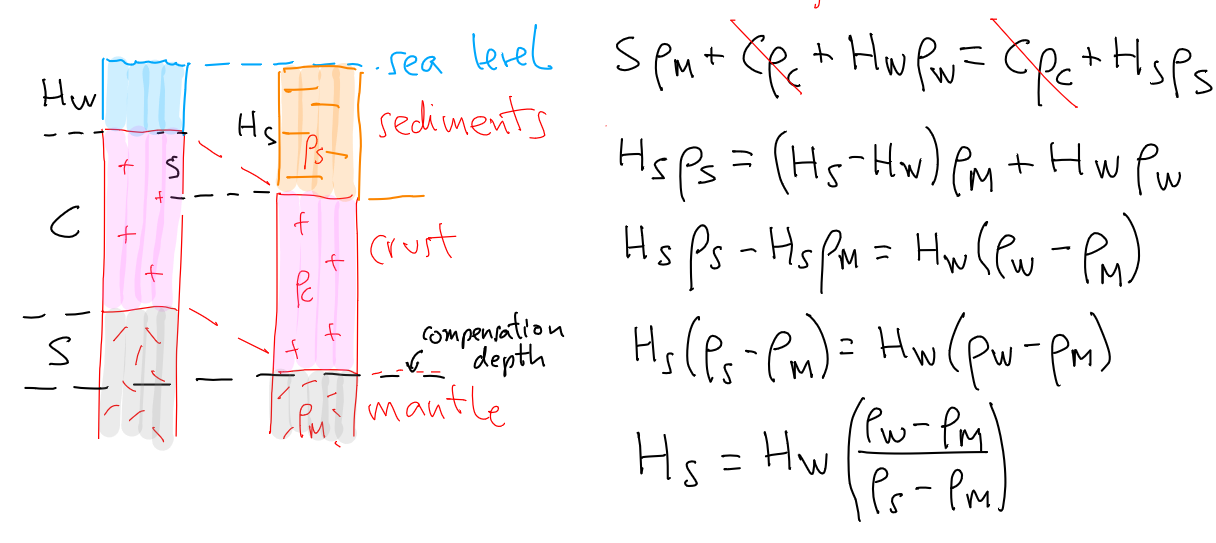

In [34]:
widgets.VBox([density_water, density_sed, density_mantle])

In [35]:
Hw = 4500
dm = density_mantle.value
dw = density_water.value
ds = density_sed.value


Hs = Hw*(dw-dm)/(ds-dm)
print('The maximum thickness of sediments is {0} meters'.format(round(Hs)))

The maximum thickness of sediments is 7962 meters


### EXERCISE 2:
##### Given a lithospheric thickness of 150km, calculate the hoizontal distance from maximum deflection to the top of the forebuldge and the maximum height of the forebuldge if the maximum deflection is 5000 meters.

In [21]:
# given a lithospheric thickness of 150km, calculate the distance to the top of the forebuldge and the height
HL = 150000
D = (Young*(HL**3))/(12*(1-Poisson**2))  #flexural rigidity
alfa = ((4*D)/((d_mantle-d_water)*gravity))**0.25     
Xfb = np.pi*alfa

#height of the forebulge given a maximum deflection of 5000m
w0 = 5000 #maximum deflection
Xfb_height = np.e**(-np.pi)*w0

print('The distance to the top of the forebuldge is {0:0<3} km and the height is {1} meters'.
      format(round(Xfb/1000),round(Xfb_height)))

The distance to the top of the forebuldge is 772 km and the height is 216 meters


### EXERCISE 3
##### Given a flexure on a continuous plate with a half-width of 150km calculate the elastic thickness of the lithosphere.

##### Solution:
1. Given x0 = 150 km, calculate the flexural parameter alfa:
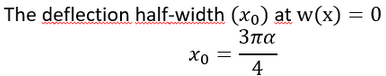

2. Calculate flexural rigidity (D) from:
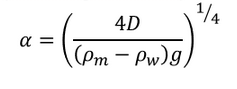

3. Calculate Elastic Thickness (E) from:
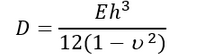

In [33]:
x0 = 150000
dm = density_mantle.value
dw = density_water.value
ds = density_sed.value

alfa = x0*4/(3*np.pi)
alfa
D = alfa**4*(dm-dw)*gravity/4

h = (D*12*(1-Poisson**2)/Young)**(1/3)

print('The flexural parameter alfa: {0} km,\
      flexural rigidity D: {1} Nm,\
      Elastic Thickness h: {2} km'.format(round(alfa/1000), D, round(h/1000)))

The flexural parameter alfa: 64 km,      flexural rigidity D: 9.444703674309591e+22 Nm,      Elastic Thickness h: 25 km
